In [107]:
# print version / should be 1.6.3
println(versioninfo())

# load centralized paths dictionary
using YAML
PATHS_FILE = "../../../PATHS.yml"
PATHS = YAML.load_file(PATHS_FILE);

"""
    load_path(keys::Vector{String}):String

Return the absolute path for a requested item within the nested PATHS dictionary.
"""
function loadpath(keys::Vector{String}):String
    # recusively assemble paths from keys
    requested_path = foldl((x, y) -> getindex(x, y), keys; init=PATHS)
    # rephrase abs path from relative paths to be platform independent.
    realpath(joinpath(splitdir(realpath(PATHS_FILE))[1], requested_path))
end;

Julia Version 1.6.3
Commit ae8452a9e0 (2021-09-23 17:34 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  __LMOD_REF_COUNT_JULIA_DEPOT_PATH = /home/biotoml/.julia:1;/sw/comp/julia/1.6.3/rackham/lib/glob_pkg:1
  JULIA_DEPOT_PATH = /home/biotoml/lsm/src/.julia/v1.6_depot:/home/biotoml/.julia:/sw/comp/julia/1.6.3/rackham/lib/glob_pkg
  __LMOD_REF_COUNT_JULIA_LOAD_PATH = @:1;@v#.#:1;@stdlib:1;/sw/comp/julia/1.6.3/rackham/lib/glob_pkg/environments/v1.6:1
  JULIA_PROJECT = /home/biotoml/lsm/src/.julia/v1.6_regrid
  JULIA_ROOT = /sw/comp/julia/1.6.3/rackham
  JULIA_LOAD_PATH = @:@v#.#:@stdlib:/sw/comp/julia/1.6.3/rackham/lib/glob_pkg/environments/v1.6
  JULIA_NUM_THREADS = 2
nothing


In [108]:
using BenchmarkTools
using Debugger
using IntervalSets
using NaNMath; nm=NaNMath
using NCDatasets
using Plots
using Revise
using StatsBase

In [115]:
include("./regridding.jl")
include("./spatialplotting.jl")

fillnan

---
---

In [74]:
file = "/home/biotoml/lsm/src/.julia/v1.7_depot/artifacts/5662e9e197e74055f9582b9ff35a9612e2a15ea7/LAI_MODIS_2X_8D_2020_V1.nc"

"/home/biotoml/lsm/src/.julia/v1.7_depot/artifacts/5662e9e197e74055f9582b9ff35a9612e2a15ea7/LAI_MODIS_2X_8D_2020_V1.nc"

In [75]:
ds = NCDataset(file, "r");

In [76]:
rgo = Regridder3D(30,60,46)

Regridder3D{Int64, Float64}(RegridAxis{Int64, Float64}[RegridAxis{Int64, Float64}("lat", -90.0, 90.0, 30), RegridAxis{Int64, Float64}("lon", -180.0, 180.0, 60), RegridAxis{Int64, Float64}("ind", 1.0, 12.0, 46)])

In [77]:
new_file = "newtrial.nc";

In [116]:
regridding_op = maximum

a=regrid_dataset(new_file, rgo, ds, ["data", "std"], regridding_op; force=true);

In [114]:
a = [1 2; 3 1]
b = [1 0; 0 1]
bb = b.==2
isempty(a[bb])

true

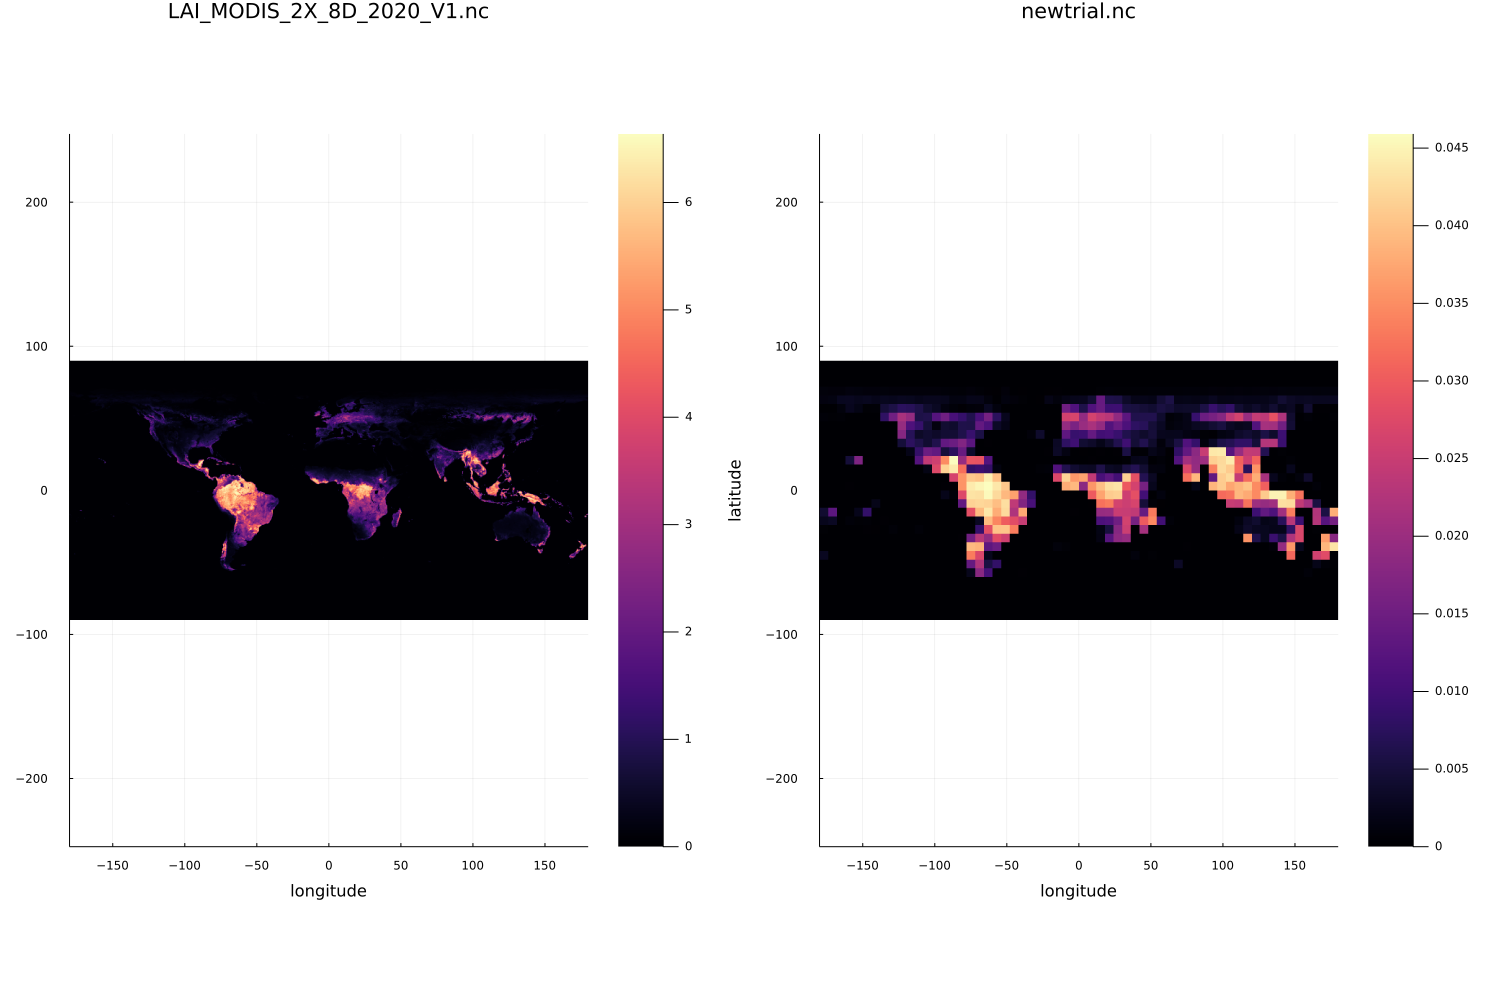

In [106]:
hmps = Dict("initial_data" => plot_ncdf(file),
            "regridded_data" => plot_ncdf(new_file))

plot(hmps["initial_data"], hmps["regridded_data"], layout = (1, 2))

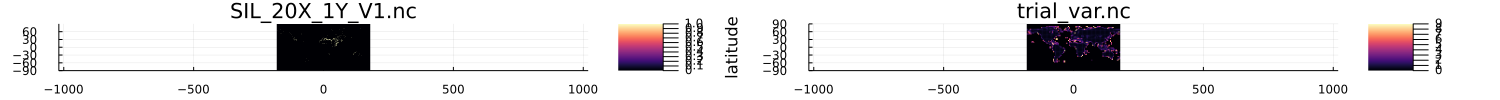

In [29]:
plot(hmps["initial_data"], hmps["regridded_data"], layout = (1, 2))
#savefig("mytestplot.pdf")

In [299]:
rgo = Regridder2D(14,99)

Regridder2D{Int64, Float64}(RegridAxis{Int64, Float64}[RegridAxis{Int64, Float64}("lat", -90.0, 90.0, 14), RegridAxis{Int64, Float64}("lon", -180.0, 180.0, 99)])

In [43]:
new_file = "trial_crazy.nc";

In [59]:
ds = NCDataset(new_file, "r");

In [60]:
ds["data"][:]

60×30×46 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.00635903  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00195527  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00392266  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0127008   0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0117257   0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.00912391  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00913461  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00870929  0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0107957   0.0         0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00852672  7.92932e-6  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.00795096  5.43282e-6  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00685976  2.24097e-7  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.00879868  6.6412

In [61]:
regridding_op = median

a=regrid2d_dataset(new_file, rgo, ds, ["data", "std"], regridding_op; force=true);

LoadError: UndefVarError: regrid2d_dataset not defined

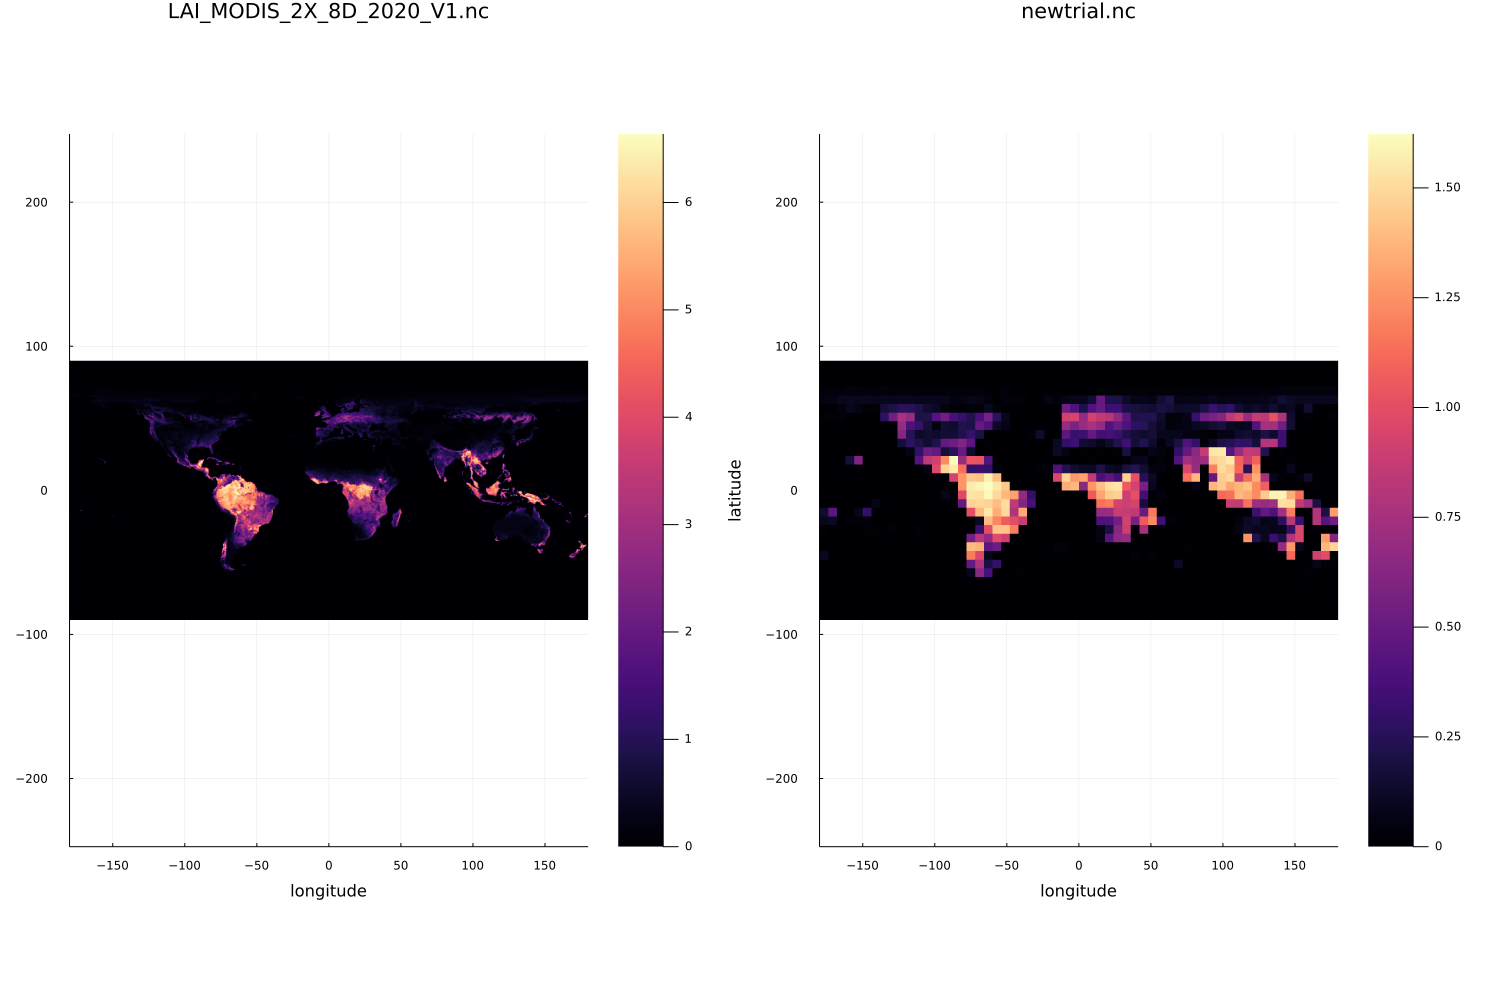

In [81]:
hmps = Dict("initial_data" => plot_ncdf(file),
            "regridded_data" => plot_ncdf(new_file))

plot(hmps["initial_data"], hmps["regridded_data"], layout = (1, 2))

In [11]:
new_file = "trial_sum.nc";

In [12]:
using StatsBase

In [13]:
regridding_op = StatsBase.variation

a=regrid2d_dataset(new_file, rgo, ds, ["data", "std"], regridding_op; force=true);

LoadError: UndefVarError: rgo not defined

In [15]:
hmps = Dict("initial_data" => plot_ncdf(file),
            "regridded_data" => plot_ncdf(new_file))

plot(hmps["initial_data"], hmps["regridded_data"], layout = (1, 2))
savefig("mytestplot.pdf")

In [ ]:
#savefig("mytestplot.pdf")

In [5]:
function regrid2d_datasetmt(regridder::Regridder2D, ncds::NCDataset, variables::AbstractArray{String}, operation::Function; kwargs...)
    regridder_ncds = Regridder2D(ncds; kwargs...)
    
    ncdims = keys(ncds.dim)
    dim_itvs = map(x -> dimwise_intervals(regridder)[x], ncdims)
    dim_itvs_ncds = map(x -> dimwise_intervals(regridder_ncds)[x], ncdims)
    
    regridded_ncds = init_regridded(tuple(map(x -> cardinality(regridder)[x], ncdims)...))
    for idx in CartesianIndices(axes(regridded_ncds))
        idxs = Tuple(idx)
        if idxs[1] == 1 
            print(idxs)
        end
        tile = map(((x,y),) -> x[y], zip(dim_itvs, idxs))
        rgrd_value = regrid_cell(ncds, [tile...], dim_itvs_ncds, variables, operation)
        if rgrd_value[1] > 0
            regridded_ncds[idxs...] = rgrd_value[1]
        end
    end
    
    regridded_ncds
end

function regrid2d_data(regridder::Regridder2D, ncds::NCDataset, variables::AbstractArray{String}, operation::Function; kwargs...)
    regridder_ncds = Regridder2D(ncds; kwargs...)
    ncdims = [k for k in keys(ncds.dim) if lowercase(k[1]) == 'l']
    print(ncdims)
    dim_itvs = map(x -> dimwise_intervals(regridder)[x], ncdims)
    dim_itvs_ncds = map(x -> dimwise_intervals(regridder_ncds)[x], ncdims)
    
    regridded_template = init_regridded(tuple(map(x -> cardinality(regridder)[x], ncdims)...))
    regridded_ncds = Dict(var => deepcopy(regridded_template)
        for var in variables)

    for idx in CartesianIndices(axes(regridded_template))
        println(idx)
        idxs = Tuple(idx)
        tile = map(((x,y),) -> x[y], zip(dim_itvs, idxs))
        rgrd_values = regrid_cell(ncds, [tile...], dim_itvs_ncds, variables, operation)

        for (j, var) in enumerate(variables)
            if rgrd_values[j] > 0
                regridded_ncds[var][idxs...] = rgrd_values[j]
            end
        end
    end
    regridded_ncds
end

function regrid2d_dataset(filename::String, regridder::Regridder2D, ncds::NCDataset, 
        variables::AbstractArray{String}, operation::Function; force::Bool=false, 
        kwargs...)
    # as default we avoid overwriting
    if ispath(filename) 
        !force ? (return) : rm(filename)
    end
    
    # in the first step we regrid the data
    regridded_ncds = regrid2d_data(regridder, ncds, variables, operation; kwargs...)

    # then we instantiate the new NetCDF file.
    new_ncds = NCDataset(filename,"c")
    
    # we run through all dimensions and add them
    ncdims = keys(ncds.dim)
    for ncdim in ncdims
        defDim(new_ncds, ncdim, cardinality(regridder)[ncdim])
        dim_levels = collect(ranges(regridder)[ncdim])
        defVar(new_ncds, ncdim, eltype(dim_levels), tuple(ncdim))
        new_ncds[ncdim][:] = dim_levels
    end
    
    # finally we copy the data
    for var in variables
        defVar(new_ncds, var, eltype(regridded_ncds[var]), tuple(ncdims...))
        new_ncds[var][:,:] = regridded_ncds[var]
    end
    new_ncds
end



regrid2d_dataset (generic function with 1 method)